In [38]:
import os
import sys
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from design_gene_blocks import DesignEblocks
# from design_IVA_primers import DesignPrimers
# from snapgene_output import SnapGeneOutput
# from utils import natural_amino_acids, plot_vector, extract_snapgene_features

# # For plasmid viewing
# import biotite.sequence as seq
# import biotite.sequence.io.genbank as gb
# import biotite.sequence.graphics as graphics
# import biotite.database.entrez as entrez
# from biotite.sequence import Feature, Location, Annotation

# !pip3 install openpyxl

# from eblocks import Mutation, Eblocks, EblockDesign, Sequence
from mutation import Mutation
from sequence import Sequence
from eblocks import Eblocks, EblockDesign

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# !pip install dna_features_viewer

In [57]:
mutation_instance = Mutation()
fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output\mutations_random_Msmeg_DnaE1_N27_2023-12-05.txt"
result = mutation_instance.parse_mutations(fp)
print(len(mutation_instance.mutations))

sequence_instance = Sequence()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")

27


1

In [59]:
eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,)

design_instance.run_design_eblocks()

Optimizing based on price per bp ...
Lowest cost: 2067.15 with cluster {2: [1401, 1773, 1425, 1374, 1272, 1368, 1977, 1719, 2172], 0: [2424, 2508, 3264, 2790, 3366, 2670, 2607, 3456, 2283, 2286, 2319, 2361, 2349, 2667, 2670, 2673, 2676, 2679, 2682, 2685], 1: [834, 504, 552, 852, 516, 561, 666, 636, 261, 327, 351, 672, 675]}
{2: [1401, 1773, 1425, 1374, 1272, 1368, 1977, 1719, 2172], 0: [2424, 2508, 3264, 2790, 3366, 2670, 2607, 3456, 2283, 2286, 2319, 2361, 2349, 2667, 2670, 2673, 2676, 2679, 2682, 2685], 1: [834, 504, 552, 852, 516, 561, 666, 636, 261, 327, 351, 672, 675]}
['R467G']
Mutation
Block_2_pos_1247_2197 cacctcgatgcccgacatcgatatcgacttcgacgaccggcgccgcggtgagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgt

['Block_2_pos_1247_2197', 'cacctcgatgcccgacatcgatatcgacttcgacgaccggcgccgcggtgagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgggcatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcagggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagctgctgggccgcggcgacaccctgggcgtgttccagctcgacggcgggcccatgcgcgacctgctgcgccgcatgcagccgaccgggttcgaagacgtcgtcgccgttatcgcgctgtaccggcccggcccgatgggcatgaacgcacacaacgactatgccgaccgcaagaacaaccggcaggccatcaaacctattcacccggaactcgaagaaccgctgcgcgagatcctcgccgagacctacggcctcatcgtctatcaagagcagatcatgcgcatcgcgcagaaggtggcgagctactcgttggcccgcgccg', 154, 'ggc']
['Block_

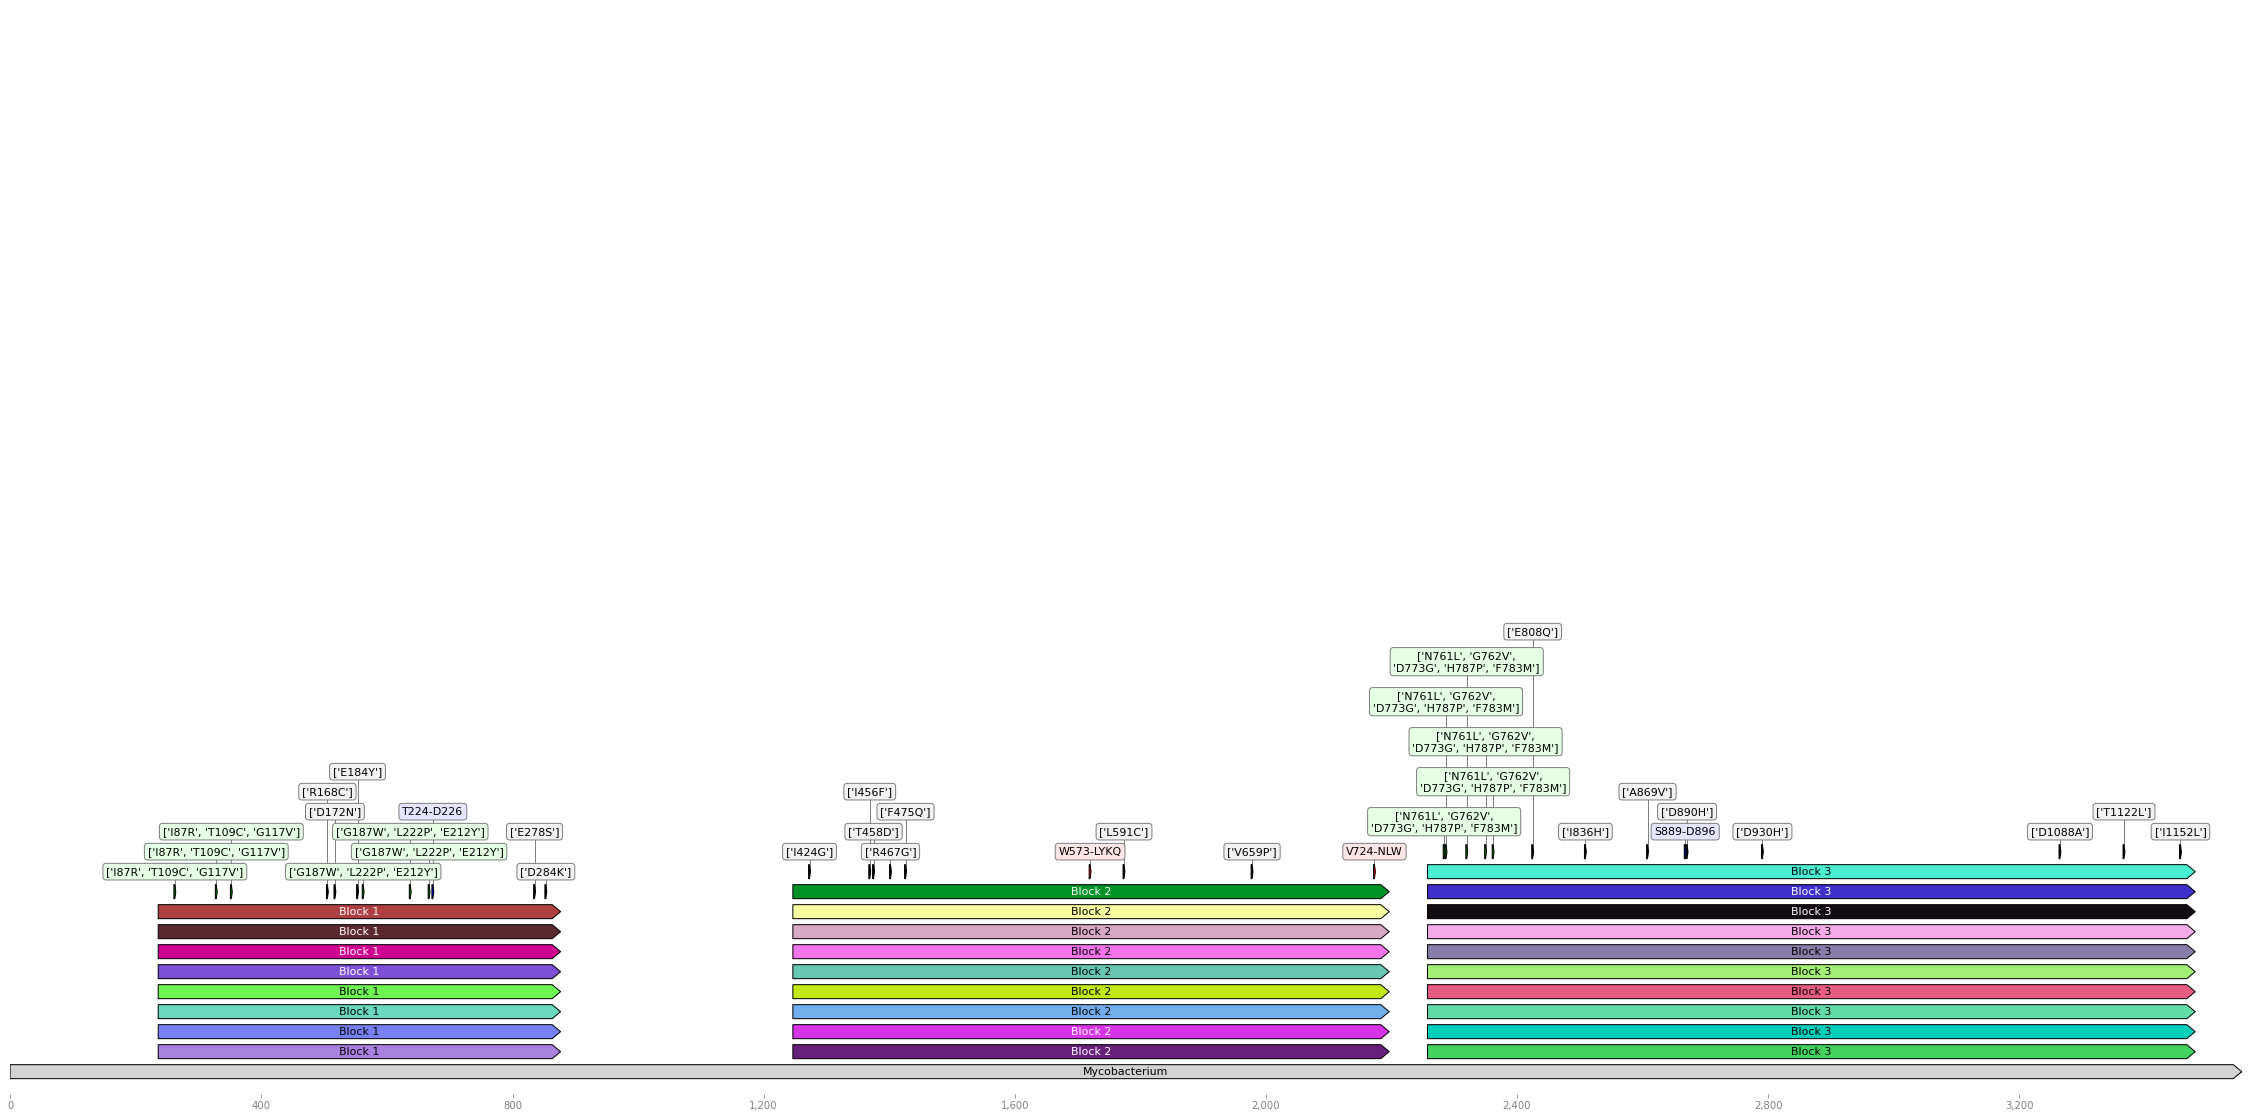

In [75]:
design_instance.plot_eblocks_mutations(output_fp=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output",
                                       show=True,
                                       figure_length=40)

In [65]:
vectorfile = 'files/snapgene_vector.dna' # TODO Change name and change vector (see snapgene computer which one to take)
msmeg_dnae1 = 'files/A0QX55.fasta'  # M. smegmatis DnaE1 gene
gene_name = "Msmeg_DnaE1"
output_location = 'output/'  # Location to store the files created in this notebook
codon_usage = 'Mycobacterium Smegmatis' # We want to use the codon usage of this organism
codon_usage_fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\data\codon_usage" # Location of the codon usage files
optimize = 'cost'

In [62]:
og = DesignEblocks(
    sequence_fp=r'C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta',
    mutations_fp=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\valid_mutations_1.txt",
    output_fp='tutorial/output/',
    codon_usage_fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\data\codon_usage", # Location of the codon usage files
    optimize='cost')

og.run()

[['S726I', 2178], ['N120T', 360], ['L329T', 987], ['L627I', 1881], ['I966Q', 2898], ['P220R', 660], ['T62T', 186], ['M490H', 1470], ['G868C', 2604], ['I399A', 1197], ['G383V', 1149], ['V99Y', 297], ['E194Q', 582], ['D975I', 2925], ['V1033R', 3099], ['I185I', 555], ['R563C', 1689], ['K459W', 1377], ['G753Y', 2259], ['P495D', 1485], [['L710C', 2130], ['D733D', 2199]], [['D1089G', 3267], ['Q1120S', 3360]], [['N225G', 675], ['H228I', 684], ['P253R', 759], ['M271A', 813]], ['K463-RWELIYK', 1389], ['Q638-LSDWRG', 1914], ['M306-V308', 918], ['R858-Y859', 2574]]
[2178, 360, 987, 1881, 2898, 660, 186, 1470, 2604, 1197, 1149, 297, 582, 2925, 3099, 555, 1689, 1377, 2259, 1485, [2130, 2199], [3267, 3360], [675, 684, 759, 813], 1389, 1914, [918, 921], [2574]]
[(2130, 2199), (3267, 3360), (675, 684, 759, 813), (918, 921), (2574,)]


SystemExit: 

In [69]:
sequence_instance = Sequence()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")

Seq('atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgag...tag')

In [63]:
instance = Mutation()
fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\valid_mutations_1.txt"
result = instance.parse_mutations(fp)

sequence_instance = Sequence()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")

print(len(instance.mutations))

# print(instance.idx_dna)

# for i in instance.mutations:
#     print(i.idx_dna)

eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=instance)

design_instance.run_design_eblocks()

27
Optimizing based on price per bp ...
Lowest cost: 1160.4 with cluster {2: [2178, 1881, 1689, 2259, 2130, 2199], 3: [360, 660, 186, 297, 582, 555, 138, 189, 675, 684, 759, 813], 1: [987, 1470, 1197, 1149, 1377, 1485, 918, 921], 0: [2898, 2604, 2925, 3099, 2574, 3267, 3360]}
{2: [2178, 1881, 1689, 2259, 2130, 2199], 3: [360, 660, 186, 297, 582, 555, 138, 189, 675, 684, 759, 813], 1: [987, 1470, 1197, 1149, 1377, 1485, 918, 921], 0: [2898, 2604, 2925, 3099, 2574, 3267, 3360]}


In [7]:
instance = Mutation()
instance.parse_mutations(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\invalid_mutations_1.txt")

Please check for non-natural amino acids in mutation Combined X710C-D733D



SystemExit: 

c:\Users\Rosan\Anaconda3\envs\eblocks_3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
instance = Mutation()
result = instance.parse_mutations(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\valid_mutations_1.txt")

print(result)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Please check format of mutation Deletion M306-V308

Traceback (most recent call last):
  File "c:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\mutation.py", line 85, in read_mutations
    idx_dna=idxs)
TypeError: append() takes no keyword arguments

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Rosan\Anaconda3\envs\eblocks_3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-42ffb35719fe>", line 2, in <module>
    result = instance.parse_mutations(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\valid_mutations_1.txt")
  File "c:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\mutation.py", line 42, in parse_mutations
    mutations = self.read_mutations(fp)
  File "c:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\mutation.py"

TypeError: object of type 'NoneType' has no len()